In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from utils.experiments import *
from config import FIGURE_DIR
import numpy as np
import matplotlib.pyplot as plt

def binary_entropy_m(m):
    """
    Binary entropy as a function of magnetization m in [-1,1]
    """
    # Convert m to probability
    p = (1 + m) / 2
    # Handle edge cases to avoid log(0)
    with np.errstate(divide='ignore', invalid='ignore'):
        H = -p*np.log(p) - (1-p)*np.log(1-p)
    H = np.nan_to_num(H)  # set 0*log(0) -> 0
    return H


In [2]:
res = []
for p in Path(f'results/rs_d=4').glob('*'):
    a = load_pickle(p)
    res.append(a)
p = 3
for p in Path(f'results/rs_p={p}').glob('*'):
    a = load_pickle(p)
    res.append(a)

df = pd.DataFrame(res)
df =df[df.d==4]

1 0.2482279911151185
2 0.057028984923343976
3 -0.028058500608089194


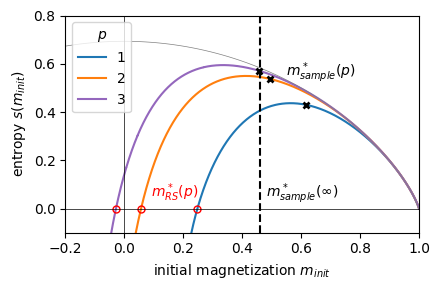

In [3]:
colors = ['tab:blue', 'tab:orange', 'tab:purple']

fig, ax = plt.subplots(figsize=(4.5, 3))  # single plot

# Plot curves
for (p, d), g in df.groupby(['p','d']):
    if p == 4:
        continue
    f = g.sort_values('mag_init')
    if p < 4:
        f = f[f.converged]
    else:
        print(f.columns)
        f = f[f.mag_init_temp < 9]
    ax.plot(f.mag_init, f.entropy, label=p, c=colors[p-1])
    
    # Zero crossings
    y = f.entropy.values
    x = f.mag_init.values 
    cross_idx = np.where(np.diff(np.sign(y)))[0]
    for idx in cross_idx:
        x0, x1 = x[idx], x[idx+1]
        y0, y1 = y[idx], y[idx+1]
        x_cross = x0 - y0*(x1-x0)/(y1-y0)
        ax.plot(x_cross, 0, 'o', mfc='none', mec='red', ms=5)
        print(p, x_cross)

# Binary entropy background
m = np.linspace(-1, 1, 100)
H = binary_entropy_m(m)
ax.plot(m, H, color='grey', lw=0.5)
ax.axvline(0.46, color='black', linestyle='dashed', linewidth=1.5)

# Sample points
m_sample_1 = (0.617, 0.880)
m_sample_2 = (0.496, 0.951)
m_sample_3 = (0.457, 0.977)
for x, y in [m_sample_1, m_sample_2, m_sample_3]:
    ax.plot(x, y * binary_entropy_m(x), 'x', mfc='none', ms=5, mew=2, c='k')

ax.text(0.55, 0.55, '$m^*_{sample}(p)$')
ax.text(0.48, 0.05, '$m^*_{sample}(\infty)$')
ax.text(0.09, 0.05, '$m^*_{RS}(p)$', color='red')

ax.axhline(0.0, color='black', lw=0.5)
ax.axvline(0.0, color='black', lw=0.5)

ax.set_ylim(-0.1, 0.8)
ax.set_xlim(-0.2, 1.0)
ax.set_xlabel('initial magnetization $m_{init}$')
ax.set_ylabel('entropy $s(m_{init})$')
ax.legend(title='$p$', loc='upper left')

plt.tight_layout()
plt.savefig(FIGURE_DIR / 'd=4_empirics_bdcm_single.pdf', dpi=300, bbox_inches='tight')
plt.show()
